In [1]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 使用openpyxl加载工作簿
wb = openpyxl.load_workbook('data/商机信息统计.xlsx')
sheet = wb.active

# 获取列字母（A, B, C等）
def get_column_letter(header_name):
    for cell in sheet[1]:  # 第一行
        if cell.value == header_name:
            return cell.column_letter
    return None

# 获取网站链接和原始链接的列
website_col = get_column_letter('网站链接')
original_col = get_column_letter('原始链接')

# 直接读取这两列的所有单元格
if website_col:
    website_cells = sheet[website_col][1:]  # 跳过标题行
if original_col:
    original_cells = sheet[original_col][1:]  # 跳过标题行

# 获取链接
website_links = []
original_links = []

if website_col:
    for cell in website_cells:
        if cell.hyperlink:
            website_links.append(cell.hyperlink.target)
        else:
            website_links.append(cell.value)  # 如果不是超链接，保留原始值

if original_col:
    for cell in original_cells:
        if cell.hyperlink:
            original_links.append(cell.hyperlink.target)
        else:
            original_links.append(cell.value)  # 如果不是超链接，保留原始值

# 使用pandas读取Excel
data = pd.read_excel('data/商机信息统计.xlsx', engine='openpyxl')

# 更新链接列
if website_col:
    data['网站链接'] = website_links
if original_col:
    data['原始链接'] = original_links



In [3]:
import re
import unicodedata

#判断单元格是否为中文的函数
def is_chinese(char):
    code_point = ord(char)
    return 0x4E00 <= code_point <= 0x9FFF

def non_chinese_ratio(text):
    if not text or pd.isna(text): 
        return 0.0
    total_chars = len(text)
    non_chinese_chars = sum(1 for char in text if not is_chinese(char))
    ratio=(non_chinese_chars/total_chars)*100
    return ratio

data["乱码"]=data["公告正文"].apply(non_chinese_ratio)>=70.0
data.head(5)


,类型,标题,项目标签,业务相关性,公告摘要,公告正文,预算金额(万),网站链接,原始链接,采购单位,招标代理,联系方式,发布日期,报名截至日期,预计采购日期,销售部门,客户代表,信息采集时间,处理标志,乱码
0,招标,中国福利彩票发行管理中心2025年信息监测及相关服务项目公开招标公告,北京市-朝阳区|民政,一般,【项目概况】： 2025年信息监测及相关服务项目，预算金额：152.42万元人民币。\n【项...,公告正文\n项目概况\n2025年信息监测及相关服务项目 招标项目的潜在投标人应在中国机械进...,152.42,"=HYPERLINK(""https://www.jianyu360.cn/page_work...","=HYPERLINK(""https://www.ccgp.gov.cn/cggg/zygg/...",中国福利彩票发行管理中心,中国机械进出口集团有限公司,【采购方联系方式】：\n李先生，010-58125705\n【采购方联系方式】：\n陈女士，...,2025-04-29,2025-05-23,NaN,行业推进事业部,陈宣霖,2025-04-30 11:28:51.159,NaN,False
1,招标,中国福利彩票发行管理中心2025年走近双色球项目公开招标公告,北京市-朝阳区|民政,无关,【项目概况】： 中国福利彩票发行管理中心2025年走近双色球项目，预算金额329.52万元。...,公告正文\n项目概况\n中国福利彩票发行管理中心2025年走近双色球项目 招标项目的潜在投标...,329.52,"=HYPERLINK(""https://www.jianyu360.cn/page_work...","=HYPERLINK(""https://www.ccgp.gov.cn/cggg/zygg/...",中国福利彩票发行管理中心,中技国际招标有限公司,【采购方联系方式】：\n李先生，010-58125705\n【采购方联系方式】：\n洪林杨、...,2025-04-29,2025-05-09,NaN,行业推进事业部,陈宣霖,2025-04-30 11:28:19.904,NaN,False
2,竞谈,嘉定校区体育中心泳池池底维修采购项目,上海市-杨浦区|学校,无关,【项目概况】： 工程建设，预算金额：97.788万元\n【项目内容】： 体育中心泳池池底瓷砖...,公告正文\n磋商公告\n一、项目概况\n项目名称：嘉定校区体育中心泳池池底维修\n项目编号：...,97.78,"=HYPERLINK(""https://www.jianyu360.cn/page_work...","=HYPERLINK(""https://czb.tongji.edu.cn/sggl/cgw...",同济大学,上海华建工程建设咨询有限公司,【采购方联系方式】：\n肖老师，021-65983577\n【采购方联系方式】：\n唐寅，0...,2025-04-29,2025-05-03,NaN,教育事业一部,张潞,2025-04-30 11:27:30.202,NaN,False
3,招标,海洋科学传感器一批采购项目招标公告,上海市-杨浦区|学校,无关,【项目概况】： 硬件采购，预算金额：人民币112.3万元\n【项目内容】： 采购4套声学多普...,公告正文\n海洋科学传感器一批采购（重）-国际招标公告\n上海中世建设咨询有限公司受招标人委...,112.30,"=HYPERLINK(""https://www.jianyu360.cn/page_work...","=HYPERLINK(""https://czb.tongji.edu.cn/sggl/cgw...",同济大学,上海中世建设咨询有限公司,【采购方联系方式】：\n徐老师，021-20926959-1046\n【采购方联系方式】：\...,2025-04-29,2025-05-09,NaN,教育事业一部,张潞,2025-04-30 11:26:59.563,NaN,False
4,招标,同济大学海洋科学传感器一批采购（重）-国际招标公告,上海市-杨浦区|学校,无关,【项目概况】： 硬件采购，项目预算112.3万元。\n【项目内容】： 采购4套声学多普勒流速...,公告正文\n上海中世建设咨询有限公司受同济大学 委托，根据《中华人民共和国政府采购法》等有关...,112.30,"=HYPERLINK(""https://www.jianyu360.cn/page_work...","=HYPERLINK(""https://www.ccgp.gov.cn/cggg/zygg/...",同济大学,上海中世建设咨询有限公司,【采购方联系方式】：\n徐老师，021-20926959-1046\n【采购方联系方式】：\...,2025-04-29,2025-05-09,NaN,教育事业一部,张潞,2025-04-30 11:26:29.846,NaN,False


In [4]:
data=data[data["乱码"]==False]
data=data[["类型","标题","项目标签","业务相关性","公告摘要","公告正文","采购单位","招标代理"]]
data

,类型,标题,项目标签,业务相关性,公告摘要,公告正文,采购单位,招标代理
0,招标,中国福利彩票发行管理中心2025年信息监测及相关服务项目公开招标公告,北京市-朝阳区|民政,一般,【项目概况】： 2025年信息监测及相关服务项目，预算金额：152.42万元人民币。\n【项...,公告正文\n项目概况\n2025年信息监测及相关服务项目 招标项目的潜在投标人应在中国机械进...,中国福利彩票发行管理中心,中国机械进出口集团有限公司
1,招标,中国福利彩票发行管理中心2025年走近双色球项目公开招标公告,北京市-朝阳区|民政,无关,【项目概况】： 中国福利彩票发行管理中心2025年走近双色球项目，预算金额329.52万元。...,公告正文\n项目概况\n中国福利彩票发行管理中心2025年走近双色球项目 招标项目的潜在投标...,中国福利彩票发行管理中心,中技国际招标有限公司
2,竞谈,嘉定校区体育中心泳池池底维修采购项目,上海市-杨浦区|学校,无关,【项目概况】： 工程建设，预算金额：97.788万元\n【项目内容】： 体育中心泳池池底瓷砖...,公告正文\n磋商公告\n一、项目概况\n项目名称：嘉定校区体育中心泳池池底维修\n项目编号：...,同济大学,上海华建工程建设咨询有限公司
3,招标,海洋科学传感器一批采购项目招标公告,上海市-杨浦区|学校,无关,【项目概况】： 硬件采购，预算金额：人民币112.3万元\n【项目内容】： 采购4套声学多普...,公告正文\n海洋科学传感器一批采购（重）-国际招标公告\n上海中世建设咨询有限公司受招标人委...,同济大学,上海中世建设咨询有限公司
4,招标,同济大学海洋科学传感器一批采购（重）-国际招标公告,上海市-杨浦区|学校,无关,【项目概况】： 硬件采购，项目预算112.3万元。\n【项目内容】： 采购4套声学多普勒流速...,公告正文\n上海中世建设咨询有限公司受同济大学 委托，根据《中华人民共和国政府采购法》等有关...,同济大学,上海中世建设咨询有限公司
...,...,...,...,...,...,...,...,...
5626,招标,上海中医药大学附属曙光医院学生宿舍租赁项目公开招标公告,上海市-浦东新区|医疗,无关,【项目概况】： 学生宿舍租赁项目，预算为二室一厅5400元/套/月，三室一厅7200元/套/...,公告正文\n \n上海中医药大学附属曙光医院学生宿舍租赁项目公开招标公告\n(招标编号:XS...,上海中医药大学附属曙光医院,上海欣声招标服务中心有限公司
5627,竞谈,上海中医药大学附属曙光医院宾得电子支气管镜及主机维保项目,上海市-长宁区|医疗,无关,【项目概况】： 医疗器械维保项目，项目预算未明确。\n【项目内容】： 宾得电子支气管镜及主机...,公告正文\n上海中医药大学附属曙光医院宾得电子支气管镜及主机维保项目（招标编号：/）\n项目...,上海中医药大学附属曙光医院,上海财瑞建设管理有限公司
5628,变更,上海中医药大学附属岳阳中西医结合医院医责险招标更正公告,上海市|医疗,无关,【项目概况】： 医责险招标，项目预算未提及。\n【项目内容】： 医责险采购，具体数量及内容未...,公告正文\n上海中医药大学附属岳阳中西医结合医院医责险招标更正公告（招标编号：招 2024-...,上海中医药大学附属岳阳中西医结合医院,上海财瑞建设管理有限公司
5629,招标,同济大学四平路校区综合运动馆项目勘察设计采购项目,上海市|学校,潜在商机,【项目概况】： 工程建设，项目预算14482万元。\n【项目内容】： 拟建一幢综合运动馆，总...,公告正文\n招标公告\n公开招标信息表\n报建编号：\n2501YP0012 \n标段号：\...,同济大学,上海教育建设管理咨询有限公司


In [5]:
单位词典=set()
for i in data["采购单位"]:
    if i not in 单位词典:
        单位词典.add(i)
print(单位词典)
with open("dict.txt","w",encoding="utf-8") as f:
    for i in 单位词典:
        f.write(i + "\n")


{'复旦大学附属华山医院招投标办公室', '上海戏剧学院附属舞蹈学校', '上海师范大学附属中学', '上海对外经贸大学', '上海海事大学', '上海市第一妇婴保健院', '上海大学信息化工作办公室', '上海外国语大学,中国建筑第八工程局有限公司', '上海交通大学医学院附属瑞金医院无锡分院', '东华大学松江校区', '上海交通大学出版社有限公司', '上海大学招生就业处', '上海师范大学附属贵安新区实验学校', '上海科技大学附属学校', '上海市福利彩票发行中心', '上海市皮肤病医院', '上海立信会计金融学院上海市学校体艺评估中心', '华东医院', '中国教育工会上海电子信息职业技术学院委员会', '上海市第六人民医院金山分院', '上海市计划生育药具管理事务中心（上海市卫生健康委员会援外物资供应站）', '同济大学四平路校区南区新建宿舍楼项目', '上海体育大学', '华东师范大学附属深圳龙华学校教育集团', '上海中医药大学附属曙光医院安徽医院', '上海理工大学、上海弘明建设（集团）有限公司', '上海科技大学生命科学与技术学院', '华东理工大学附属闵行科技高级中学', '教育部复旦大学', '东华大学、中国二十冶集团有限公司', '上海申康医院发展中心', '上海市第一人民医院,上海建工二建集团有限公司', '上海师范大学附属七星关区实验学校', '复旦大学附属华山医院', '上海立信会计金融学院信息技术中心', '上海市儿童医院', '华东理工大学', '上海交通大学医学院附属新华医院,上海交通大学', '上海财经大学浙江学院', '上海大学文学院', '上海电力大学、上海建工二建集团有限公司', '上海市高校科技发展中心', '上海应用技术大学后勤保障与服务中心', '上海立信会计金融学院上海市学校体艺术评估中心', '中国福利会国际和平妇幼保健院', '复旦大学、上海建工二建集团有限公司', '上海市同济口腔医院（同济大学附属口腔医院）', '上海公安学院', '上海理工大学', '上海建桥学院有限责任公司', '上海海事大学教育发展基金会', '上海市皮肤病医院工会委员会', '上海市第六人民医院工会', '上海立信会计金融学院附属高行中学', '上海大学发展规划处', '上海电影艺术职业学院', '上海立信会计金融学院后勤保障处

In [6]:
import jieba
import re

# 重新加载词典前先重置jieba
jieba.initialize()  # 重置jieba
print("Loading custom dictionary...")
jieba.load_userdict("dict.txt")

def 精确分词(text):
    # 使用精确模式分词
    seg_list = jieba.cut(text, cut_all=False)
    return list(seg_list)


data['标题分词'] = data['标题'].apply(精确分词)

# 显示前5行结果
print("\n前5行分词结果：")
data[['标题', '标题分词']].head()
data

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/kk/fqsqqccn52dftn_l1fb2fpc40000gn/T/jieba.cache
Loading model cost 0.312 seconds.
Prefix dict has been built successfully.


Loading custom dictionary...

前5行分词结果：


,类型,标题,项目标签,业务相关性,公告摘要,公告正文,采购单位,招标代理,标题分词
0,招标,中国福利彩票发行管理中心2025年信息监测及相关服务项目公开招标公告,北京市-朝阳区|民政,一般,【项目概况】： 2025年信息监测及相关服务项目，预算金额：152.42万元人民币。\n【项...,公告正文\n项目概况\n2025年信息监测及相关服务项目 招标项目的潜在投标人应在中国机械进...,中国福利彩票发行管理中心,中国机械进出口集团有限公司,"[中国福利彩票发行管理中心, 2025, 年, 信息, 监测, 及, 相关, 服务项目, 公..."
1,招标,中国福利彩票发行管理中心2025年走近双色球项目公开招标公告,北京市-朝阳区|民政,无关,【项目概况】： 中国福利彩票发行管理中心2025年走近双色球项目，预算金额329.52万元。...,公告正文\n项目概况\n中国福利彩票发行管理中心2025年走近双色球项目 招标项目的潜在投标...,中国福利彩票发行管理中心,中技国际招标有限公司,"[中国福利彩票发行管理中心, 2025, 年, 走近, 双色球, 项目, 公开招标, 公告]"
2,竞谈,嘉定校区体育中心泳池池底维修采购项目,上海市-杨浦区|学校,无关,【项目概况】： 工程建设，预算金额：97.788万元\n【项目内容】： 体育中心泳池池底瓷砖...,公告正文\n磋商公告\n一、项目概况\n项目名称：嘉定校区体育中心泳池池底维修\n项目编号：...,同济大学,上海华建工程建设咨询有限公司,"[嘉定, 校区, 体育中心, 泳池, 池底, 维修, 采购, 项目]"
3,招标,海洋科学传感器一批采购项目招标公告,上海市-杨浦区|学校,无关,【项目概况】： 硬件采购，预算金额：人民币112.3万元\n【项目内容】： 采购4套声学多普...,公告正文\n海洋科学传感器一批采购（重）-国际招标公告\n上海中世建设咨询有限公司受招标人委...,同济大学,上海中世建设咨询有限公司,"[海洋, 科学, 传感器, 一批, 采购, 项目, 招标, 公告]"
4,招标,同济大学海洋科学传感器一批采购（重）-国际招标公告,上海市-杨浦区|学校,无关,【项目概况】： 硬件采购，项目预算112.3万元。\n【项目内容】： 采购4套声学多普勒流速...,公告正文\n上海中世建设咨询有限公司受同济大学 委托，根据《中华人民共和国政府采购法》等有关...,同济大学,上海中世建设咨询有限公司,"[同济大学, 海洋, 科学, 传感器, 一批, 采购, （, 重, ）, -, 国际, 招标..."
...,...,...,...,...,...,...,...,...,...
5626,招标,上海中医药大学附属曙光医院学生宿舍租赁项目公开招标公告,上海市-浦东新区|医疗,无关,【项目概况】： 学生宿舍租赁项目，预算为二室一厅5400元/套/月，三室一厅7200元/套/...,公告正文\n \n上海中医药大学附属曙光医院学生宿舍租赁项目公开招标公告\n(招标编号:XS...,上海中医药大学附属曙光医院,上海欣声招标服务中心有限公司,"[上海中医药大学附属曙光医院, 学生宿舍, 租赁, 项目, 公开招标, 公告]"
5627,竞谈,上海中医药大学附属曙光医院宾得电子支气管镜及主机维保项目,上海市-长宁区|医疗,无关,【项目概况】： 医疗器械维保项目，项目预算未明确。\n【项目内容】： 宾得电子支气管镜及主机...,公告正文\n上海中医药大学附属曙光医院宾得电子支气管镜及主机维保项目（招标编号：/）\n项目...,上海中医药大学附属曙光医院,上海财瑞建设管理有限公司,"[上海中医药大学附属曙光医院, 宾得, 电子, 支气管镜, 及, 主机, 维保, 项目]"
5628,变更,上海中医药大学附属岳阳中西医结合医院医责险招标更正公告,上海市|医疗,无关,【项目概况】： 医责险招标，项目预算未提及。\n【项目内容】： 医责险采购，具体数量及内容未...,公告正文\n上海中医药大学附属岳阳中西医结合医院医责险招标更正公告（招标编号：招 2024-...,上海中医药大学附属岳阳中西医结合医院,上海财瑞建设管理有限公司,"[上海中医药大学附属岳阳中西医结合医院, 医责险, 招标, 更正, 公告]"
5629,招标,同济大学四平路校区综合运动馆项目勘察设计采购项目,上海市|学校,潜在商机,【项目概况】： 工程建设，项目预算14482万元。\n【项目内容】： 拟建一幢综合运动馆，总...,公告正文\n招标公告\n公开招标信息表\n报建编号：\n2501YP0012 \n标段号：\...,同济大学,上海教育建设管理咨询有限公司,"[同济大学, 四平路, 校区, 综合, 运动, 馆, 项目, 勘察, 设计, 采购, 项目]"


In [7]:
data[["相关性标注1低2中3高","商业潜力标注1低2中3高"]]=np.nan
抽样标注 = data.sample(n=1000, random_state=42)  
抽样标注.to_json("data/抽样1000.json", force_ascii=False, orient='records', indent=2)
#data.to_json('data/待标注.json', force_ascii=False, orient='records', indent=2)

In [8]:
抽样标完=pd.read_json("data/抽样.json")
抽样标完

,类型,标题,项目标签,业务相关性,公告摘要,公告正文,采购单位,招标代理,标题分词,相关性标注1低2中3高,商业潜力标注1低2中3高
0,预告,碳纳米管阵列自组装模拟的技术开发项目采购项目延期公告,学校,待定,【项目概况】： 技术开发项目，具体预算未提及。\n【项目内容】： 碳纳米管阵列自组装模拟的技...,一、项目基本情况\n原公告的采购项目编号：H2025016（代理机构内部编号：招案2025-...,华东师范大学,上海中世建设咨询有限公司,"[碳纳米管, 阵列, 自, 组装, 模拟, 的, 技术开发, 项目, 采购, 项目, 延期,...",1.0,1.0
1,招标,[招设2025A00007]上海交通大学深海柔性结构智能试验系统—拉弯试验机液压站、拉弯试验...,学校,无关,【项目概况】： 工程建设，预算金额250.00万元人民币。\n【项目内容】： 购买1套深海柔...,上海交通大学深海柔性结构智能试验系统—拉弯试验机\n液压站、拉弯试验机油源分配系统和拉弯试验...,上海交通大学,中金招标有限责任公司,"[[, 招设, 2025A00007, ], 上海交通大学, 深海, 柔性, 结构, 智能,...",2.0,1.0
2,招标,一期四栋楼电梯设施设备更新的公开招标公告,上海市|医疗,无关,【项目概况】： 工程建设，预算金额239.5万元。\n【项目内容】： 更新一期四栋楼电梯设施...,公告正文\n项目概况\n 一期四栋楼电梯设施设备更新 招标项目的潜在投标人应在上海市政府采购...,上海市养志康复医院（上海市阳光康复中心）,上海市政府采购中心,"[一期, 四栋, 楼, 电梯, 设施, 设备, 更新, 的, 公开招标, 公告]",1.0,1.0
3,招标,复旦大学附属妇产科医院长三角一体化示范区青浦分院物业管理服务项目的公开招标公告,上海市-青浦区|医疗,无关,【项目概况】： 物业管理服务项目，预算金额：1526.4万元。\n【项目内容】： 复旦大学附...,公告正文\n项目概况\n 复旦大学附属妇产科医院长三角一体化示范区青浦分院物业管理服务项目 ...,复旦大学附属妇产科医院长三角一体化示范区青浦分院,上海市青浦区政府采购中心,"[复旦大学附属妇产科医院长三角一体化示范区青浦分院, 物业管理, 服务项目, 的, 公开招标...",1.0,1.0
4,询价,上海交通大学医学院附属新华医院循环上皮细胞分离仪的比价公告,医疗,无关,【项目概况】： 项目类型：硬件设备购买。项目预算：9万元。\n【项目内容】： 采购2套循环上...,项目概况\n上海交通大学医学院附属新华医院（以下称“采购人”）拟采购循环上皮细胞分离仪，现对...,上海交通大学医学院附属新华医院,None,"[上海交通大学医学院附属新华医院, 循环, 上皮细胞, 分离, 仪, 的, 比价, 公告]",1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
95,招标,上海海洋大学多波段荧光全景扫描系统项目的公开招标公告,学校,无关,【项目概况】： 上海海洋大学多波段荧光全景扫描系统项目，预算金额105万元，属于硬件设备购买...,项目概况\n 上海海洋大学多波段荧光全景扫描系统项目 招标项目的潜在投标人应在上海市政府采购...,上海海洋大学,上海申诣建设咨询有限公司,"[上海海洋大学, 多, 波段, 荧光, 全景, 扫描, 系统, 项目, 的, 公开招标, 公告]",2.0,2.0
96,招标,校园消防设施建设改造（二期）招标公告,上海市-宝山区|学校,无关,【项目概况】： 工程建设，项目预算32万元。\n【项目内容】： 对宝山校区、杨浦校区内的消防...,公告正文\n \n校园消防设施建设改造(二期)招标公告\n(招标编号:祥咨招(施)2025第...,上海济光职业技术学院,上海祥浦建设工程监理咨询有限责任公司,"[校园, 消防设施, 建设, 改造, （, 二期, ）, 招标, 公告]",1.0,1.0
97,招标,复旦大学双光子激光共聚焦显微镜国际公开招标公告,上海市-杨浦区|学校,无关,【项目概况】： 硬件采购，预算金额：450万元。\n【项目内容】： 采购1套双光子激光共聚焦...,公告正文\n项目概况\n复旦大学双光子激光共聚焦显微镜 招标项目的潜在投标人应在复旦大学采购...,复旦大学,上海政采项目管理有限公司,"[复旦大学, 双, 光子, 激光, 共, 聚焦, 显微镜, 国际, 公开招标, 公告]",1.0,1.0
98,招标,中国福利会国际和平妇幼保健院多普勒胎心听诊器,上海市-徐汇区|卫健委,无关,【项目概况】： 硬件采购项目，预算未明确。\n【项目内容】： 采购多普勒胎心听诊器30台。\...,公告正文\n中国福利会国际和平妇幼保健院多普勒胎心听诊器（招标编号：招 2025-0463-...,中国福利会国际和平妇幼保健院,上海财瑞建设管理有限公司,"[中国福利会国际和平妇幼保健院, 多普勒, 胎心, 听诊器]",1.0,1.0



#载入模型

In [9]:
from sentence_transformers import SentenceTransformer
import os

from sentence_transformers import SentenceTransformer
sbert=SentenceTransformer('local_models/all-MiniLM-L6-v2')



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
import json, os, random
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sentence_transformers import SentenceTransformer, InputExample, losses, evaluation
from torch.utils.data import DataLoader
from pathlib import Path

In [11]:
数据集=pd.read_json("data/抽样.json")
数据集["标题分词"]=数据集["标题分词"].apply(lambda x:str(x))
数据集.head()
def 摘要处理(text):
    return re.sub(r'【[^】]*】\s*[:：]?', '', text)
数据集["公告摘要"]=数据集["公告摘要"].apply(摘要处理)
数据集

,类型,标题,项目标签,业务相关性,公告摘要,公告正文,采购单位,招标代理,标题分词,相关性标注1低2中3高,商业潜力标注1低2中3高
0,预告,碳纳米管阵列自组装模拟的技术开发项目采购项目延期公告,学校,待定,技术开发项目，具体预算未提及。\n 碳纳米管阵列自组装模拟的技术开发。\n 未明确提及，需...,一、项目基本情况\n原公告的采购项目编号：H2025016（代理机构内部编号：招案2025-...,华东师范大学,上海中世建设咨询有限公司,"['碳纳米管', '阵列', '自', '组装', '模拟', '的', '技术开发', '...",1.0,1.0
1,招标,[招设2025A00007]上海交通大学深海柔性结构智能试验系统—拉弯试验机液压站、拉弯试验...,学校,无关,工程建设，预算金额250.00万元人民币。\n 购买1套深海柔性结构智能试验系统—拉弯试验...,上海交通大学深海柔性结构智能试验系统—拉弯试验机\n液压站、拉弯试验机油源分配系统和拉弯试验...,上海交通大学,中金招标有限责任公司,"['[', '招设', '2025A00007', ']', '上海交通大学', '深海',...",2.0,1.0
2,招标,一期四栋楼电梯设施设备更新的公开招标公告,上海市|医疗,无关,工程建设，预算金额239.5万元。\n 更新一期四栋楼电梯设施设备，共需采购客梯及货梯共1...,公告正文\n项目概况\n 一期四栋楼电梯设施设备更新 招标项目的潜在投标人应在上海市政府采购...,上海市养志康复医院（上海市阳光康复中心）,上海市政府采购中心,"['一期', '四栋', '楼', '电梯', '设施', '设备', '更新', '的',...",1.0,1.0
3,招标,复旦大学附属妇产科医院长三角一体化示范区青浦分院物业管理服务项目的公开招标公告,上海市-青浦区|医疗,无关,物业管理服务项目，预算金额：1526.4万元。\n 复旦大学附属妇产科医院长三角一体化示范...,公告正文\n项目概况\n 复旦大学附属妇产科医院长三角一体化示范区青浦分院物业管理服务项目 ...,复旦大学附属妇产科医院长三角一体化示范区青浦分院,上海市青浦区政府采购中心,"['复旦大学附属妇产科医院长三角一体化示范区青浦分院', '物业管理', '服务项目', '...",1.0,1.0
4,询价,上海交通大学医学院附属新华医院循环上皮细胞分离仪的比价公告,医疗,无关,项目类型：硬件设备购买。项目预算：9万元。\n 采购2套循环上皮细胞分离仪。\n 需具备《...,项目概况\n上海交通大学医学院附属新华医院（以下称“采购人”）拟采购循环上皮细胞分离仪，现对...,上海交通大学医学院附属新华医院,None,"['上海交通大学医学院附属新华医院', '循环', '上皮细胞', '分离', '仪', '...",1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
95,招标,上海海洋大学多波段荧光全景扫描系统项目的公开招标公告,学校,无关,上海海洋大学多波段荧光全景扫描系统项目，预算金额105万元，属于硬件设备购买。\n 购买1...,项目概况\n 上海海洋大学多波段荧光全景扫描系统项目 招标项目的潜在投标人应在上海市政府采购...,上海海洋大学,上海申诣建设咨询有限公司,"['上海海洋大学', '多', '波段', '荧光', '全景', '扫描', '系统', ...",2.0,2.0
96,招标,校园消防设施建设改造（二期）招标公告,上海市-宝山区|学校,无关,工程建设，项目预算32万元。\n 对宝山校区、杨浦校区内的消防设施进行改造，包括安消联动门...,公告正文\n \n校园消防设施建设改造(二期)招标公告\n(招标编号:祥咨招(施)2025第...,上海济光职业技术学院,上海祥浦建设工程监理咨询有限责任公司,"['校园', '消防设施', '建设', '改造', '（', '二期', '）', '招标...",1.0,1.0
97,招标,复旦大学双光子激光共聚焦显微镜国际公开招标公告,上海市-杨浦区|学校,无关,硬件采购，预算金额：450万元。\n 采购1套双光子激光共聚焦显微镜，具备高扫描分辨率、快...,公告正文\n项目概况\n复旦大学双光子激光共聚焦显微镜 招标项目的潜在投标人应在复旦大学采购...,复旦大学,上海政采项目管理有限公司,"['复旦大学', '双', '光子', '激光', '共', '聚焦', '显微镜', '国...",1.0,1.0
98,招标,中国福利会国际和平妇幼保健院多普勒胎心听诊器,上海市-徐汇区|卫健委,无关,硬件采购项目，预算未明确。\n 采购多普勒胎心听诊器30台。\n 法人或自然人，无重大违法...,公告正文\n中国福利会国际和平妇幼保健院多普勒胎心听诊器（招标编号：招 2025-0463-...,中国福利会国际和平妇幼保健院,上海财瑞建设管理有限公司,"['中国福利会国际和平妇幼保健院', '多普勒', '胎心', '听诊器']",1.0,1.0


In [12]:
小样本=pd.read_json("data/抽样1000_已标注.json")
小样本["标题分词"]=小样本["标题分词"].apply(lambda x:str(x))
小样本.head()
def 摘要处理(text):
    return re.sub(r'【[^】]*】\s*[:：]?', '', text)
小样本["公告摘要"]=小样本["公告摘要"].apply(摘要处理)
小样本

,类型,标题,项目标签,业务相关性,公告摘要,公告正文,采购单位,招标代理,标题分词,相关性标注1低2中3高,商业潜力标注1低2中3高
0,预告,碳纳米管阵列自组装模拟的技术开发项目采购项目延期公告,学校,待定,技术开发项目，具体预算未提及。\n 碳纳米管阵列自组装模拟的技术开发。\n 未明确提及，需...,一、项目基本情况\n原公告的采购项目编号：H2025016（代理机构内部编号：招案2025-...,华东师范大学,上海中世建设咨询有限公司,"['碳纳米管', '阵列', '自', '组装', '模拟', '的', '技术开发', '...",1,2
1,招标,[招设2025A00007]上海交通大学深海柔性结构智能试验系统—拉弯试验机液压站、拉弯试验...,学校,无关,工程建设，预算金额250.00万元人民币。\n 购买1套深海柔性结构智能试验系统—拉弯试验...,上海交通大学深海柔性结构智能试验系统—拉弯试验机\n液压站、拉弯试验机油源分配系统和拉弯试验...,上海交通大学,中金招标有限责任公司,"['[', '招设', '2025A00007', ']', '上海交通大学', '深海',...",2,3
2,招标,一期四栋楼电梯设施设备更新的公开招标公告,上海市|医疗,无关,工程建设，预算金额239.5万元。\n 更新一期四栋楼电梯设施设备，共需采购客梯及货梯共1...,公告正文\n项目概况\n 一期四栋楼电梯设施设备更新 招标项目的潜在投标人应在上海市政府采购...,上海市养志康复医院（上海市阳光康复中心）,上海市政府采购中心,"['一期', '四栋', '楼', '电梯', '设施', '设备', '更新', '的',...",1,3
3,招标,复旦大学附属妇产科医院长三角一体化示范区青浦分院物业管理服务项目的公开招标公告,上海市-青浦区|医疗,无关,物业管理服务项目，预算金额：1526.4万元。\n 复旦大学附属妇产科医院长三角一体化示范...,公告正文\n项目概况\n 复旦大学附属妇产科医院长三角一体化示范区青浦分院物业管理服务项目 ...,复旦大学附属妇产科医院长三角一体化示范区青浦分院,上海市青浦区政府采购中心,"['复旦大学附属妇产科医院长三角一体化示范区青浦分院', '物业管理', '服务项目', '...",1,3
4,询价,上海交通大学医学院附属新华医院循环上皮细胞分离仪的比价公告,医疗,无关,项目类型：硬件设备购买。项目预算：9万元。\n 采购2套循环上皮细胞分离仪。\n 需具备《...,项目概况\n上海交通大学医学院附属新华医院（以下称“采购人”）拟采购循环上皮细胞分离仪，现对...,上海交通大学医学院附属新华医院,None,"['上海交通大学医学院附属新华医院', '循环', '上皮细胞', '分离', '仪', '...",1,2
...,...,...,...,...,...,...,...,...,...,...,...
995,招标,上海市胸科医院结算中心改造项目招标公告,上海市|医疗,潜在商机,工程建设，项目预算94.916814万元。\n 改建面积约280平方米。\n 建筑工程施工...,公告正文\n上海市胸科医院结算中心改造项目招标公告（招标编号：SHCSC2025G054）\...,上海市胸科医院,上海申康卫生基建管理有限公司,"['上海市胸科医院', '结算', '中心', '改造', '项目', '招标', '公告']",1,3
996,招标,上海市养志康复医院（上海市阳光康复中心）工伤康复管理系统（2025年运维项目）招标公告,上海市|医疗,一般,软件系统运维项目，项目预算未明确。\n 工伤康复管理系统的2025年运维工作。\n 需具备...,公告正文\n工伤康复管理系统（2025年运维项目）招标公告\n查看原文链接\n各位客官，快来...,上海市养志康复医院（上海市阳光康复中心）,None,"['上海市养志康复医院', '（', '上海市', '阳光', '康复中心', '）', '...",2,1
997,询价,上海交通大学医学院附属新华医院超声软组织切割止血设备采购的比价公告,医疗,无关,"采购项目超声软组织切割止血设备，数量1台，最高限价98,000.00元。\n 购买1台超声...",项目概况\n上海交通大学附属新华医院（以下称“采购人”）采购项目超声软组织切割止血设备，现对...,上海交通大学医学院附属新华医院,None,"['上海交通大学医学院附属新华医院', '超声', '软组织', '切割', '止血', '...",1,2
998,招标,复旦大学智能教学演示评审系统快速交易公告,上海市-杨浦区|学校,很高,系统集成，预算金额49.80万元。\n 采购1套智能教学演示评审系统，用于提高评审效率及数...,公告正文\n根据《复旦大学快速交易采购实施细则（试行）》的规定，复旦大学（以下简称采购人） ...,复旦大学,上海政采项目管理有限公司,"['复旦大学', '智能', '教学', '演示', '评审', '系统', '快速', '...",2,2


In [13]:
df = 小样本[['标题', '公告摘要', '相关性标注1低2中3高', '商业潜力标注1低2中3高','标题分词']].dropna()
df['text'] = df['标题']+ ' ' + df['公告摘要']
df = df.rename(columns={
    '相关性标注1低2中3高': 'rel',
    '商业潜力标注1低2中3高': 'pot'
    })
df[['text', 'rel', 'pot']]
df.to_csv("data/抽样1000_已标注.csv")
df.head()

,标题,公告摘要,rel,pot,标题分词,text
0,碳纳米管阵列自组装模拟的技术开发项目采购项目延期公告,技术开发项目，具体预算未提及。\n 碳纳米管阵列自组装模拟的技术开发。\n 未明确提及，需...,1,2,"['碳纳米管', '阵列', '自', '组装', '模拟', '的', '技术开发', '...",碳纳米管阵列自组装模拟的技术开发项目采购项目延期公告 技术开发项目，具体预算未提及。\n ...
1,[招设2025A00007]上海交通大学深海柔性结构智能试验系统—拉弯试验机液压站、拉弯试验...,工程建设，预算金额250.00万元人民币。\n 购买1套深海柔性结构智能试验系统—拉弯试验...,2,3,"['[', '招设', '2025A00007', ']', '上海交通大学', '深海',...",[招设2025A00007]上海交通大学深海柔性结构智能试验系统—拉弯试验机液压站、拉弯试验...
2,一期四栋楼电梯设施设备更新的公开招标公告,工程建设，预算金额239.5万元。\n 更新一期四栋楼电梯设施设备，共需采购客梯及货梯共1...,1,3,"['一期', '四栋', '楼', '电梯', '设施', '设备', '更新', '的',...",一期四栋楼电梯设施设备更新的公开招标公告 工程建设，预算金额239.5万元。\n 更新一期...
3,复旦大学附属妇产科医院长三角一体化示范区青浦分院物业管理服务项目的公开招标公告,物业管理服务项目，预算金额：1526.4万元。\n 复旦大学附属妇产科医院长三角一体化示范...,1,3,"['复旦大学附属妇产科医院长三角一体化示范区青浦分院', '物业管理', '服务项目', '...",复旦大学附属妇产科医院长三角一体化示范区青浦分院物业管理服务项目的公开招标公告 物业管理服...
4,上海交通大学医学院附属新华医院循环上皮细胞分离仪的比价公告,项目类型：硬件设备购买。项目预算：9万元。\n 采购2套循环上皮细胞分离仪。\n 需具备《...,1,2,"['上海交通大学医学院附属新华医院', '循环', '上皮细胞', '分离', '仪', '...",上海交通大学医学院附属新华医院循环上皮细胞分离仪的比价公告 项目类型：硬件设备购买。项目预...


In [14]:
texts = df['text'].tolist()
embeddings = sbert.encode(texts, show_progress_bar=True)
np.save('embeddings.npy', embeddings)
relevance = df['rel'].values.astype(np.float32)
potential = df['pot'].values.astype(np.float32)
import torch
import torch.nn as nn

#封装一个全连接神经网络，设计输入层和sbert转化的text的vectror 384位一样，384个node
import torch
import torch.nn as nn

class DualRegression(nn.Module):
    def __init__(self, input_dim=384, hidden_dim=256):
        super().__init__()
        # 共享特征处理层
        self.shared_layers = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, hidden_dim)
        )
        
        # 双回归分支
        self.relevance_head = nn.Sequential(
            nn.Linear(hidden_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1))
        
        self.potential_head = nn.Sequential(
            nn.Linear(hidden_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1))

    def forward(self, x):
        shared = self.shared_layers(x)
        relevance = self.relevance_head(shared)
        potential = self.potential_head(shared)
        return relevance.squeeze(), potential.squeeze()

Batches: 100%|██████████| 32/32 [00:04<00:00,  6.50it/s]



=== Fold 1/5 ===
Epoch 1/50 | Train Loss: 0.9698 | Val Loss: 0.4925
Epoch 2/50 | Train Loss: 0.4680 | Val Loss: 0.4519
Epoch 3/50 | Train Loss: 0.4479 | Val Loss: 0.4633
Epoch 4/50 | Train Loss: 0.4414 | Val Loss: 0.4373
Epoch 5/50 | Train Loss: 0.4431 | Val Loss: 0.5207
Epoch 6/50 | Train Loss: 0.4528 | Val Loss: 0.4276
Epoch 7/50 | Train Loss: 0.4493 | Val Loss: 0.4369
Epoch 8/50 | Train Loss: 0.4066 | Val Loss: 0.3751
Epoch 9/50 | Train Loss: 0.3600 | Val Loss: 0.3626
Epoch 10/50 | Train Loss: 0.3458 | Val Loss: 0.3778
Epoch 11/50 | Train Loss: 0.3370 | Val Loss: 0.4162
Epoch 12/50 | Train Loss: 0.3361 | Val Loss: 0.3596
Epoch 13/50 | Train Loss: 0.3071 | Val Loss: 0.3723
Epoch 14/50 | Train Loss: 0.3071 | Val Loss: 0.3869
Epoch 15/50 | Train Loss: 0.2982 | Val Loss: 0.4018
Epoch 16/50 | Train Loss: 0.2970 | Val Loss: 0.3889
Epoch 17/50 | Train Loss: 0.2893 | Val Loss: 0.3932
Epoch 18/50 | Train Loss: 0.2620 | Val Loss: 0.3869
Epoch 19/50 | Train Loss: 0.2399 | Val Loss: 0.3624
Epo

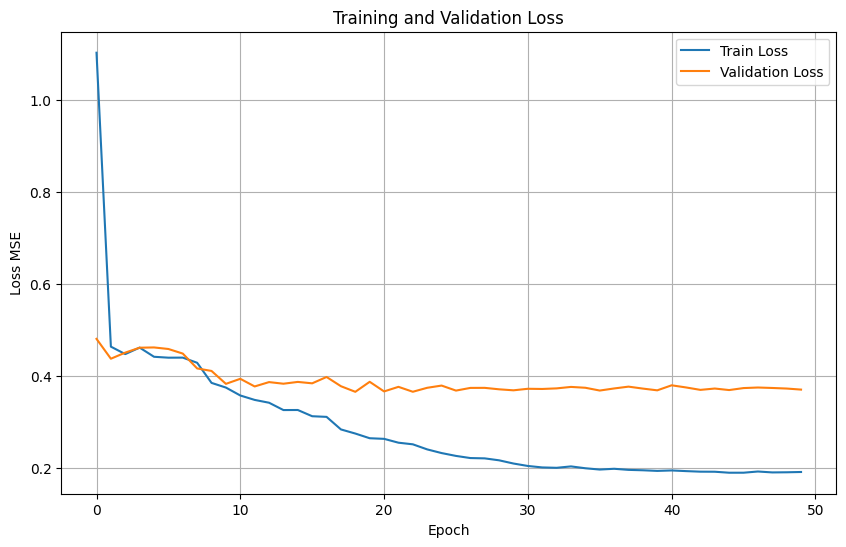

In [15]:
from sklearn.model_selection import KFold
from torch.utils.data import Dataset, DataLoader

train_losses = []
val_losses = []

# 自定义数据集
class TextDataset(Dataset):
    def __init__(self, embeddings, rel, pot):
        self.embeddings = embeddings
        self.rel = rel
        self.pot = pot
        
    def __len__(self):
        return len(self.embeddings)
    
    def __getitem__(self, idx):
        return (
            torch.tensor(self.embeddings[idx]),
            torch.tensor(self.rel[idx]),
            torch.tensor(self.pot[idx])
        )

# 初始化K折
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
embeddings = np.load('embeddings.npy')
dataset = TextDataset(embeddings, relevance, potential)

# 训练配置
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.MSELoss()  # 回归任务用MSE损失
epochs = 50
results = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(dataset)):
    print(f'\n=== Fold {fold+1}/5 ===')
    
    # 数据加载器
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_idx)
    val_subsampler = torch.utils.data.SubsetRandomSampler(val_idx)
    train_loader = DataLoader(dataset, batch_size=16, sampler=train_subsampler)
    val_loader = DataLoader(dataset, batch_size=16, sampler=val_subsampler)
    
    # 初始化模型
    model = DualRegression().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5)
    
    # 训练循环
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for emb, rel, pot in train_loader:
            emb, rel, pot = emb.to(device), rel.to(device), pot.to(device)
            
            optimizer.zero_grad()
            pred_rel, pred_pot = model(emb)
            
            loss_rel = criterion(pred_rel, rel)
            loss_pot = criterion(pred_pot, pot)
            loss = 0.5*loss_rel + 0.5*loss_pot  # 双任务等权损失
            
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        # 验证评估
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for emb, rel, pot in val_loader:
                emb, rel, pot = emb.to(device), rel.to(device), pot.to(device)
                pred_rel, pred_pot = model(emb)
                
                loss_rel = criterion(pred_rel, rel)
                loss_pot = criterion(pred_pot, pot)
                val_loss += (0.5*loss_rel + 0.5*loss_pot).item()
        train_losses.append(train_loss/len(train_loader))
        val_losses.append(val_loss/len(val_loader))
        
        scheduler.step(val_loss)
        print(f'Epoch {epoch+1}/{epochs} | Train Loss: {train_loss/len(train_loader):.4f} | Val Loss: {val_loss/len(val_loader):.4f}')
    
    # 保存最佳模型
    torch.save(model.state_dict(), f'model_fold{fold}.pth')
    results.append(val_loss/len(val_loader))

print(f'\nK-Fold结果: 平均验证损失 {np.mean(results):.4f}')

train_losses=np.array(train_losses).reshape(5,epochs)
train_mean=np.mean(train_losses,axis=0)
train_mean=train_mean.reshape(1,epochs)
val_losses=np.array(val_losses).reshape(5,epochs)
val_mean=np.mean(val_losses,axis=0)
val_mean=val_mean.reshape(1,epochs)


plt.figure(figsize=(10,6))
plt.plot(train_mean[0], label='Train Loss')
plt.plot(val_mean[0], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss MSE')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
import torch
import numpy as np
from sentence_transformers import SentenceTransformer
from torch import nn

# 1. 定义与训练时相同的模型结构
class DualRegression(nn.Module):
    def __init__(self, input_dim=384, hidden_dim=256):
        super().__init__()
        self.shared_layers = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, hidden_dim)
        )
        
        # 双回归分支
        self.relevance_head = nn.Sequential(
            nn.Linear(hidden_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1))
        
        self.potential_head = nn.Sequential(
            nn.Linear(hidden_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1))

    def forward(self, x):
        shared = self.shared_layers(x)
        relevance = self.relevance_head(shared)
        potential = self.potential_head(shared)
        return relevance.squeeze(), potential.squeeze()

# 2. 加载模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_path = "/Users/yiangxu/Desktop/爬虫/fenxi/model_fold4.pth"

# 初始化模型并加载权重
model = DualRegression().to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()  # 设置为评估模式（禁用dropout等）

# 3. 初始化Sentence-BERT编码器

# 4. 定义预测函数
def predict(text):
    # 文本编码
    embedding = sbert.encode([text], convert_to_tensor=True)
    
    # 模型预测
    with torch.no_grad():
        rel_score, pot_score = model(embedding.to(device))
    
    # 转换为Python标量值
    return rel_score.item(), pot_score.item()

# 5. 使用示例
if __name__ == "__main__":
    # 测试文本
    test_text = "上海."
    
    # 进行预测
    relevance, potential = predict(test_text)
    
    # 打印结果（限制在1-3分范围内）
    print(f"预测结果:")
    print(f"相关度: {max(1.0, min(3.0, relevance)):.2f}")
    print(f"商业潜力: {max(1.0, min(3.0, potential)):.2f}")
    
    # 批量预测示例
    texts = [
        "上海东海职业技术学院经管学院实训室硬件升级项目竞争性磋商公告【项目概况】： 系统集成，项目预算55万元。\n【项目内容】： 经管学院实训室硬件升级，合同签订后20天内交付。\n【投标人资格要求】： 符合政府采购法，无失信记录，不接受联合体。",
        "复旦大学附属华山医院总院信息中心机房改造扩容更正公告 【项目概况】： 系统集成，项目预算未明确。【项目内容】： 复旦大学附属华山医院总院信息中心机房改造扩容。【投标人资格要求】： 资质要求未明确，需联系采购代理机构了解详情。",
        "上海市精神卫生中心家具项目三的公开招标公告 【项目概况】： 家具采购项目，预算金额为302.25万元。项目内容】： 采购病区、诊疗家具，数量为3包。投标人资格要求】： 符合政府采购法，面向中小企业，不接受联合投标。"
    ]
    
    print("\n批量预测结果:")
    for text in texts:
        rel, pot = predict(text)
        print(f"文本: {text[:30]}... | 相关度: {max(1.0, min(3.0, rel)):.2f} | 潜力: {max(1.0, min(3.0, pot)):.2f}")

/var/folders/kk/fqsqqccn52dftn_l1fb2fpc40000gn/T/ipykernel_75387/2977660017.py:47: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path,

预测结果:
相关度: 1.69
商业潜力: 3.00

批量预测结果:
文本: 上海东海职业技术学院经管学院实训室硬件升级项目竞争性磋商公告... | 相关度: 1.42 | 潜力: 1.92
文本: 复旦大学附属华山医院总院信息中心机房改造扩容更正公告 【项目... | 相关度: 2.05 | 潜力: 2.16
文本: 上海市精神卫生中心家具项目三的公开招标公告 【项目概况】： ... | 相关度: 1.00 | 潜力: 1.93


In [25]:
玩具集=[]
结果=pd.DataFrame({"文本":玩具集,"相关度":0,"潜力":0})
while len(玩具集)<1000:
    玩具集.append(np.random.choice((data['标题'])))

for item in 玩具集:
    rel, pot = predict(item)
    
    结果.loc[len(结果)]=item,rel,pot

结果

,文本,相关度,潜力
0,[招设2025B00025]上海交通大学船体中组立焊接门架系统采购公告,1.096598,2.275420
1,上海交通大学医学院附属第九人民医院房屋租赁及管理项目招标公告,0.940807,2.534907
2,上海市血液中心血液筛查室内质控品采购项目公开招标公告,0.952801,1.951147
3,上海市疾病预防控制中心(上海市预防医学科学院)压片机等设备采购招标公告,1.031312,2.385897
4,“略知皮毛”青少年皮肤健康课程开发及技术服务,1.120400,1.379506
...,...,...,...
995,上海交通大学医学院附属新华医院新生儿床项目的比价公告,1.022132,2.345215
996,[比选公告]变速柴油机高精度油耗预测方法研究服务项目HFBX2025036,1.070390,1.956246
997,冷冻消融治疗仪(氩氦刀)-1国际招标澄清或变更公告(2),0.956934,1.882098
998,复旦大学2025-2027年度实验室一般固体废物处置服务公开招标公告,1.040041,2.276022


In [26]:
结果=结果.sort_values(by='相关度',ascending=False)
结果.to_csv("data/结果.csv")
结果.sort_values(by='相关度',ascending=False)

,文本,相关度,潜力
190,智慧学习功能提升-AI基础能力及应用拓展服务项目的竞争性磋商公告,2.541887,1.832075
383,基于人工智能教学应用知识库管理系统及智能问答智能体应用采购公告,2.319763,1.738523
930,上海科技大学硬X射线自由电子激光装置-FEL-I电气机柜的采购文件更正公告,2.315791,2.280926
240,信息楼智慧教室设备采购安装项目,2.122279,1.322647
860,上海中医药大学附属曙光医院曙光医院WIFI网络服务（招一用五）竞争性磋商公告,2.078822,2.920593
...,...,...,...
320,东华大学松江校区新建学生公寓综合楼,0.832151,3.169302
341,东华大学松江校区新建学生食堂项目弱电工程更正公告,0.825322,2.701798
303,张江校区保洁保绿综合服务的公开招标公告,0.821565,2.181104
116,复旦大学张江校区科研二号楼2F、7F家具采购公开招标公告,0.809533,2.796691


In [27]:
predict('上海市公安局松江分局指挥决策系统-智能图像子系统(运维)的中标（成交）结果公告')


(1.3096115589141846, 1.830857753753662)

In [28]:
predict('上海交通大学医学院附属瑞金医院电生理三维标测设备采购项目国际公开招标公告')

(1.354992151260376, 1.9979373216629028)

In [29]:
predict("上海交通大学医学院附属第九人民医院全景X光机等设备国际公开招标公告")

(1.183703064918518, 2.0110297203063965)

In [30]:
predict("2025年“e嘉乐”智慧养老服务")

(2.435971975326538, 1.546819806098938)

In [31]:
predict("上海大学智慧机器人管理平台公告")

(1.146998643875122, 2.445072889328003)

In [32]:
predict("崇明区卫生信息化平台2025年度云租赁项目的中标（成交）结果公告")

(1.230802297592163, 1.361047387123108)